In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit
%matplotlib inline

In [2]:
### import data of simulation 1 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1,vx_1,vy_1,vz_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
### import data of simulation 2 with IMBH ###

if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2,vx_2,vy_2,vz_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation 1 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31,32,33,34), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data of simulation 2 without IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2,=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z#,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### load radii, actions, half light and half mass radii for simulations ###
r3d_1,J_phi_1,J_theta_1,J_r_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH1.txt')
r3d_2,J_phi_2,J_theta_2,J_r_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_IMBH2.txt')
r3d_wo_1,J_phi_wo_1,J_theta_wo_1,J_r_wo_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH1.txt')
r3d_wo_2,J_phi_wo_2,J_theta_wo_2,J_r_wo_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/actions_noIMBH2.txt')
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2=np.loadtxt('half_mass_and_half_light_radius')

In [7]:
### initialize orbit class ###

bh_orbit_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m1_1[0]+m2_1[0])
bh_orbit_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m1_2[0]+m2_2[0])
wobh_orbit_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
wobh_orbit_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [8]:
### loads guiding star radii for every star of both simulations ###
r_guide_bh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH1.txt',unpack='True')
r_guide_bh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_IMBH2.txt',unpack='True')
r_guide_wobh_1=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH1.txt',unpack='True')
r_guide_wobh_2=np.loadtxt('../../sophia/Dokumente/Bachelorarbeit-2/r_guide_noIMBH2.txt',unpack='True')


In [9]:
per_1=np.zeros(len(r_3d_1[1:]))
per_2=np.zeros(len(r_3d_2[1:]))
per_wo_1=np.zeros(len(r_3d_wo_1[1:]))
per_wo_2=np.zeros(len(r_3d_wo_2[1:]))

r_3d_1=r_3d_1[1:]
r_3d_2=r_3d_2[1:]
x_1=x_1[1:]
x_2=x_2[1:]
y_1=y_1[1:]
y_2=y_2[1:]
z_1=z_1[1:]
z_2=z_2[1:]
vx_1=vx_1[1:]
vx_2=vx_2[1:]
vy_1=vy_1[1:]
vy_2=vy_2[1:]
vz_1=vz_1[1:]
vz_2=vz_2[1:]

for i in range(len(r_3d_1[1:])):
    per_1[i]=bh_orbit_1.periapocenter(r_3d_1[i],x_1[i],y_1[i],z_1[i],vx_1[i],vy_1[i],vz_1[i])[0]
for i in range(len(r_3d_2[1:])):
    per_2[i]=bh_orbit_2.periapocenter(r_3d_2[i],x_2[i],y_2[i],z_2[i],vx_2[i],vy_2[i],vz_2[i])[0]
for i in range(len(r_3d_wo_1[1:])):
    per_wo_1[i]=wobh_orbit_1.periapocenter(r_3d_wo_1[i],x_wo_1[i],y_wo_1[i],z_wo_1[i],vx_wo_1[i],vy_wo_1[i],vz_wo_1[i])[0]
for i in range(len(r_3d_wo_2[1:])):
    per_wo_2[i]=wobh_orbit_2.periapocenter(r_3d_wo_2[i],x_wo_2[i],y_wo_2[i],z_wo_2[i],vx_wo_2[i],vy_wo_2[i],vz_wo_2[i])[0]

np.savetxt('../Dokumente/Bachelorarbeit-2/per_IMBH1.txt',(per_1))
np.savetxt('../Dokumente/Bachelorarbeit-2/per_IMBH2.txt',(per_2))
np.savetxt('../Dokumente/Bachelorarbeit-2/per_noIMBH1.txt',(per_wo_1))
np.savetxt('../Dokumente/Bachelorarbeit-2/per_noIMBH2.txt',(per_wo_2))


In [9]:
### sorts action arrays as guiding star radius array is sorted ###

#with IMBH 1
r_guide_bh_argsort_1=np.argsort(r_guide_bh_1)
r_guide_bh_sort_1=r_guide_bh_1[r_guide_bh_argsort_1]
J_r_bh_sort_1=J_r_1[r_guide_bh_argsort_1]
J_theta_bh_sort_1=J_theta_1[r_guide_bh_argsort_1]
J_phi_bh_sort_1=J_phi_1[r_guide_bh_argsort_1]

#with IMBH 2
r_guide_bh_argsort_2=np.argsort(r_guide_bh_2)
r_guide_bh_sort_2=r_guide_bh_2[r_guide_bh_argsort_2]
J_r_bh_sort_2=J_r_2[r_guide_bh_argsort_2]
J_theta_bh_sort_2=J_theta_2[r_guide_bh_argsort_2]
J_phi_bh_sort_2=J_phi_2[r_guide_bh_argsort_2]

#without IMBH 1
r_guide_wobh_argsort_1=np.argsort(r_guide_wobh_1)
r_guide_wobh_sort_1=r_guide_wobh_1[r_guide_wobh_argsort_1]
J_r_wobh_sort_1=J_r_wo_1[r_guide_wobh_argsort_1]
J_theta_wobh_sort_1=J_theta_wo_1[r_guide_wobh_argsort_1]
J_phi_wobh_sort_1=J_phi_wo_1[r_guide_wobh_argsort_1]

#without IMBH 2
r_guide_wobh_argsort_2=np.argsort(r_guide_wobh_2)
r_guide_wobh_sort_2=r_guide_wobh_2[r_guide_wobh_argsort_2]
J_r_wobh_sort_2=J_r_wo_2[r_guide_wobh_argsort_2]
J_theta_wobh_sort_2=J_theta_wo_2[r_guide_wobh_argsort_2]
J_phi_wobh_sort_2=J_phi_wo_2[r_guide_wobh_argsort_2]

In [11]:
E_1 = bh_orbit_1.energy(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])
k_1_test=E_1<-0.4e-23
l_1_test=J_r_1>500
l=np.flatnonzero(k_1_test+l_1_test)
l=l+1

/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


ValueError: operands could not be broadcast together with shapes (1026733,) (1026734,) 

In [12]:
### find unnormal behaving stars ###

#E_1 = bh_orbit_1.energy(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])
#L_1=bh_orbit_1.angularmom(x_1[1:],y_1[1:],z_1[1:],vx_1[1:],vy_1[1:],vz_1[1:])[0]
group1_1_test=E_1<-0.9e-24
group2_1_test=J_r_1>150

group1=np.flatnonzero(group1_1_test)
group2=np.flatnonzero(group2_1_test)

group3_test=(r_guide_bh_1>10.)*(r_guide_bh_1<20.)
group3=np.flatnonzero(group3_test)
#E_2 = bh_orbit_2.energy(x_2[1:],y_2[1:],z_2[1:],vx_2[1:],vy_2[1:],vz_2[1:])
#L_2=bh_orbit_2.angularmom(x_2[1:],y_2[1:],z_2[1:],vx_2[1:],vy_2[1:],vz_2[1:])[0]
#group1_2=E_2<-0.9e-24
#group2_2=J_r_2>150
#l_2=np.flatnonzero(k_2_test+l_2_test)
#print(l_1,l_2)

/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater


In [20]:
print((group3[0:200]))
print(len(group3))
print((group3[-200:-1]))
#print(group1_2,group2_2)
#print(l)

[557091 563229 569702 573058 573522 574147 574545 578800 584292 585624
 586369 586696 591950 592170 598018 601233 601408 602155 602264 602476
 604732 604937 606303 606400 606414 608017 608676 610003 612937 614390
 614559 616594 617217 617406 617509 618073 618112 621433 621679 624573
 625798 625993 627513 630979 632217 632993 633590 633859 635533 637660
 639295 639654 639877 641848 642068 642401 642494 642936 643339 643647
 644334 644747 645515 645871 646602 647061 647540 647675 648876 649282
 650009 650128 651917 652222 653256 653487 654645 654864 656023 656327
 656395 656626 656631 657954 659620 659637 660919 661118 661500 661635
 663146 664785 665684 665956 666123 667331 667438 668680 668736 669508
 670204 670319 670468 670618 670907 671707 671888 672790 674333 674680
 674942 675473 675518 675849 676427 676824 677411 677697 677961 678058
 678193 678233 678986 679714 680009 680049 680732 680897 681123 682339
 682960 683078 683132 684648 686125 686166 686409 686414 686523 687596
 68897

1024912 34.2328 35.20179007481136
-3.86018568206e-26 33.5198120993
1024924 34.2402 34.64534458730379
-3.81957864409e-26 43.2906124349
1024947 34.292 43.642938038880715
-3.82288409958e-26 53.6072716956
1024962 34.3128 34.57307286805308
-3.29735748078e-26 45.7439153085
1024963 34.3137 35.934857501569994
-3.37237459637e-26 51.9241647543
1024964 34.3145 34.37732758464823
-3.64083247164e-26 45.0751670947
1024971 34.3364 34.90823144003433
-3.76104256515e-26 39.5479630126
1024976 34.3428 34.36267027864332
-3.66098491823e-26 40.8268406116
1024982 34.3504 34.54745577325858
-3.66214755984e-26 47.0691077283
1024993 34.3619 34.46933532732881
-3.56596950414e-26 47.7573849667
1025010 34.3782 34.37979135084648
-3.70566563727e-26 21.0625973262
1025020 34.389 35.325610280835704
-3.24492231147e-26 42.5154571444
1025021 34.3891 35.4610277169593
-3.83744393032e-26 44.3702312869
1025026 34.3952 37.001291880843446
-3.55397428152e-26 41.4614150016
1025028 34.3958 34.51700943010837
-3.38405996574e-26 35.73377

/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/sophia/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 34.4703 34.51512565135903
-3.86592576418e-26 48.074755527
1025087 34.5015 36.02539104620166
-3.83648369913e-26 23.3802313566
1025105 34.5357 35.41208189068673
-3.55712048617e-26 34.1767524506
1025125 34.5723 34.669355455657204
-3.67755628122e-26 48.0669922517
1025142 34.6049 35.288119332911954
-3.86354166448e-26 41.545186165
1025152 34.6142 34.65879290793838
-3.81599396527e-26 47.8087774945
1025165 34.6348 34.67244293028051
-2.8974490075e-26 30.7118443963
1025166 34.6348 38.768561649599995
-3.56346642983e-26 42.1959939399
1025182 34.662 35.91201737016739
-3.67074980937e-26 46.6253871609
1025187 34.6714 35.54888913142387
-3.50709802594e-26 48.4100299839
1025190 34.6761 34.71007350844806
-3.45926233679e-26 44.7652622892
1025192 34.6876 35.504214575376146
-3.66675202046e-26 40.8753956832
1025200 34.7058 34.732955451863624
-2.78902426736e-26 48.1270839185
1025209 34.7245 38.544382484612306
-3.78680127704e-26 54.4521830704
1025217 34.7367 34.73717213536793
-3.8589423354e-26 41.5024726482
1

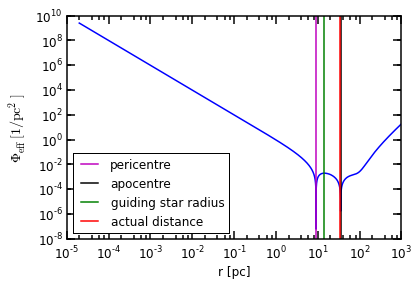

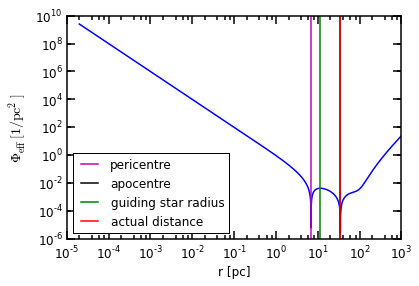

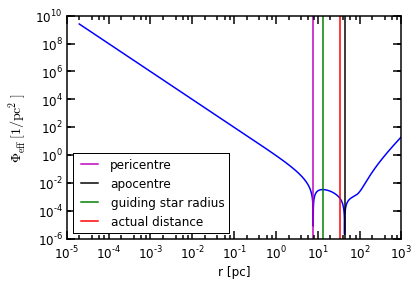

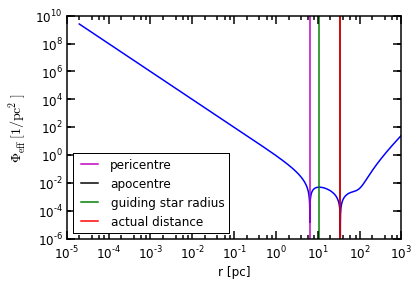

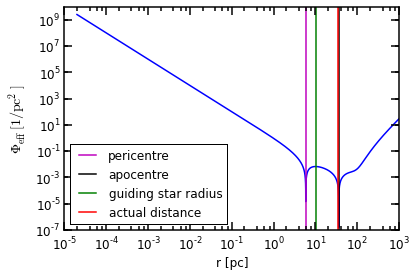

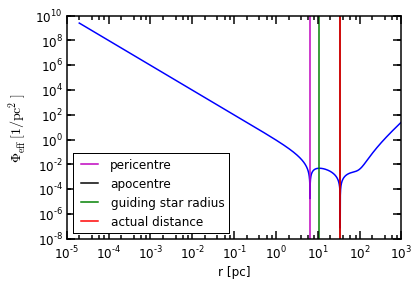

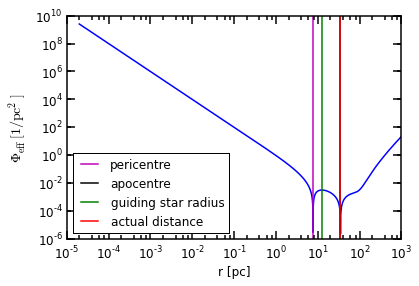

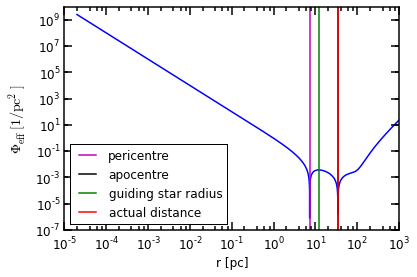

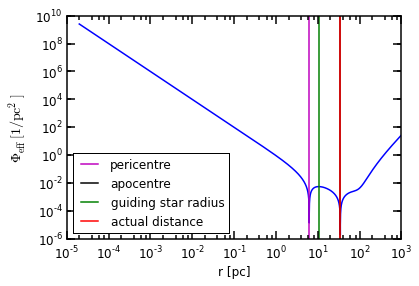

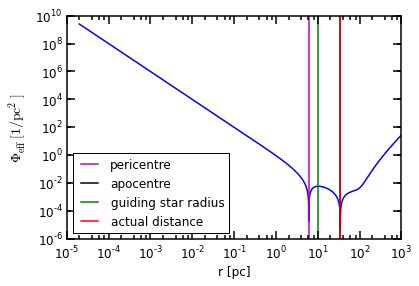

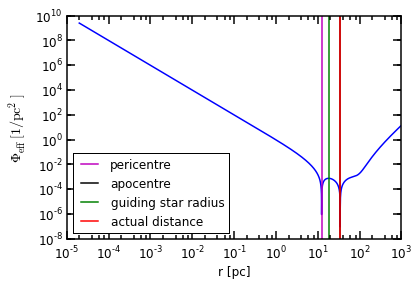

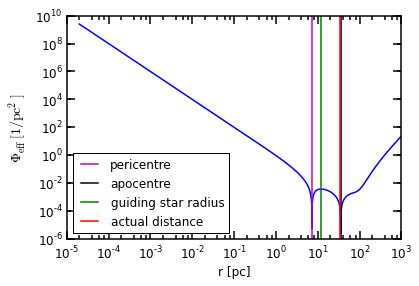

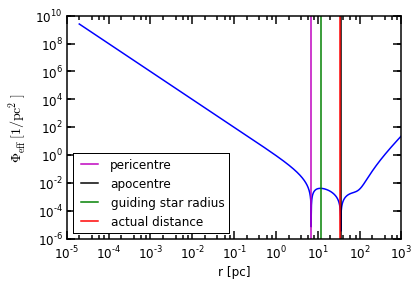

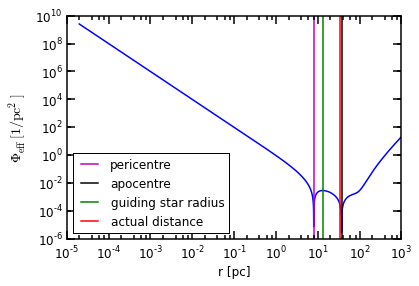

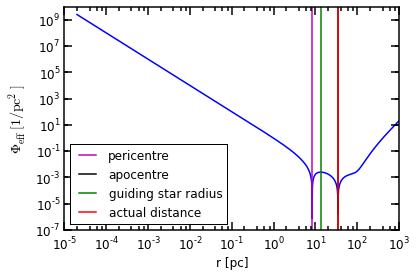

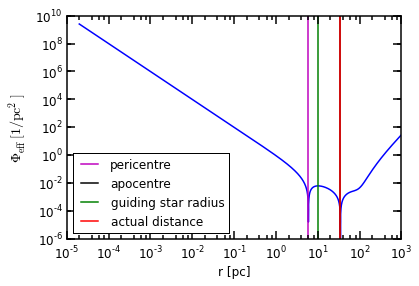

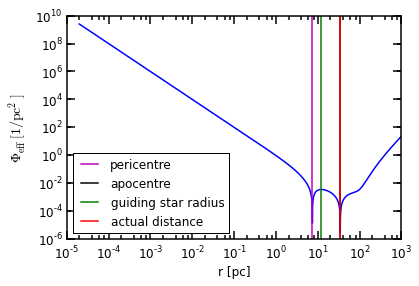

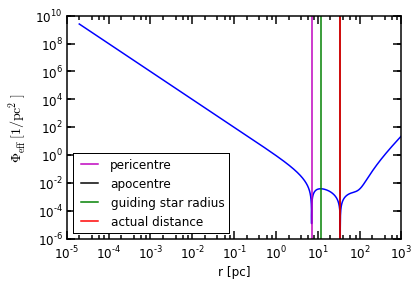

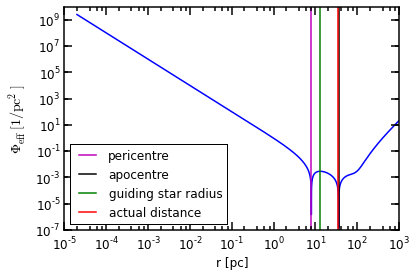

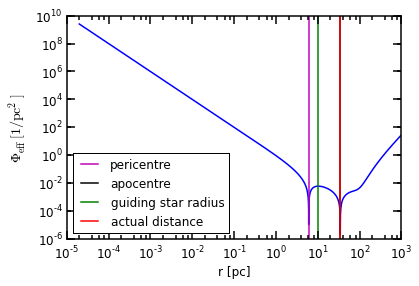

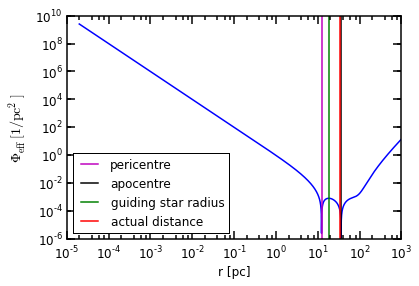

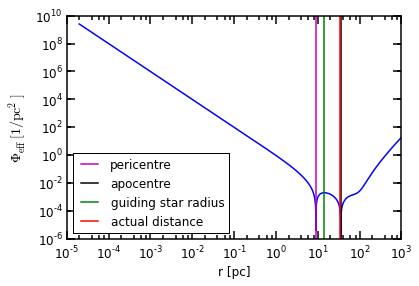

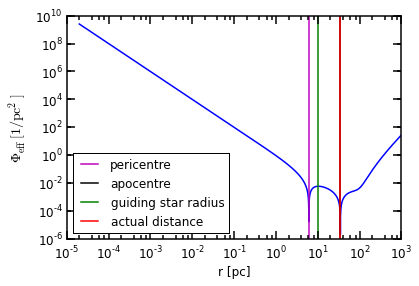

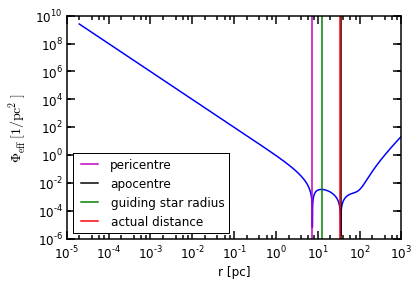

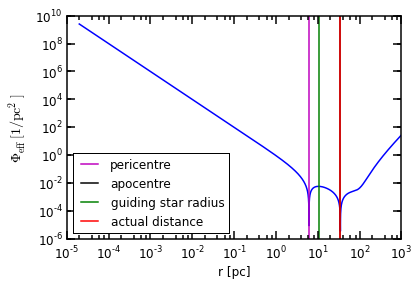

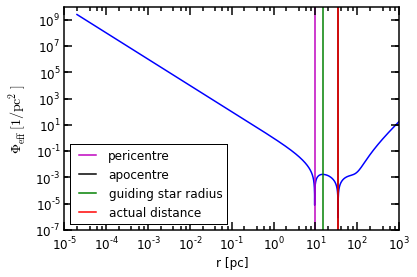

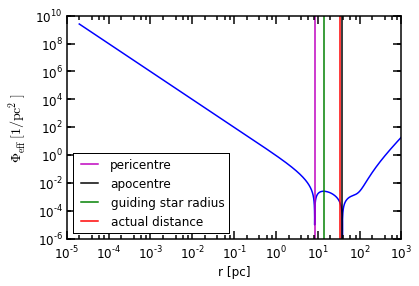

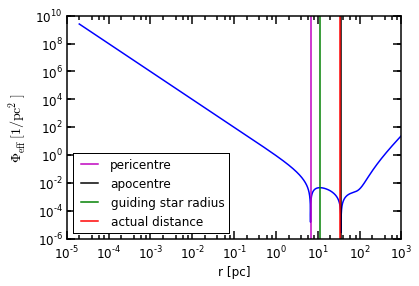

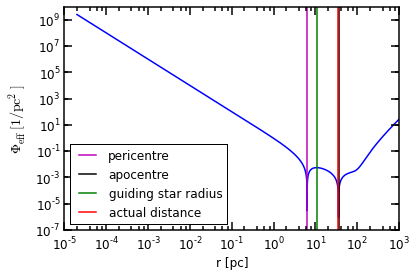

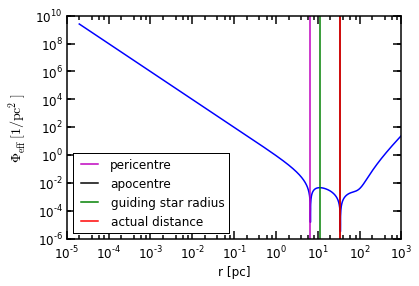

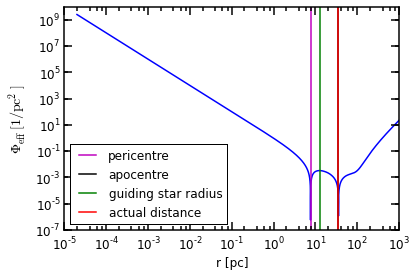

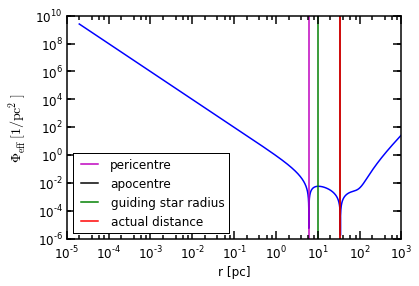

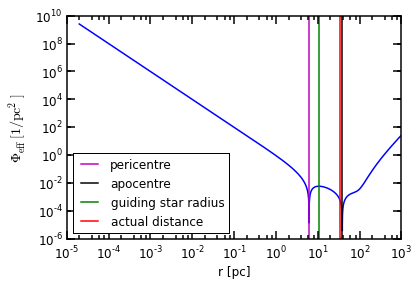

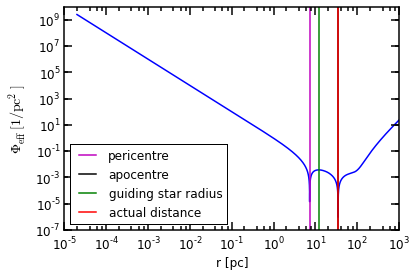

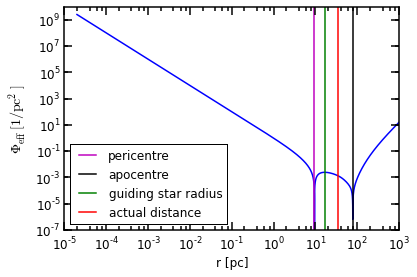

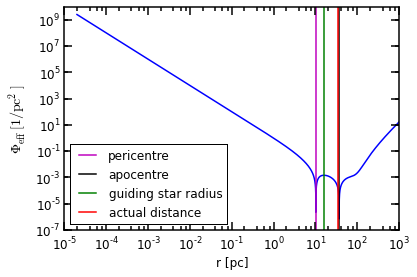

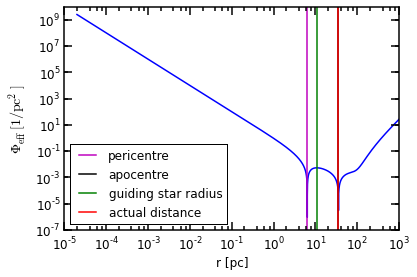

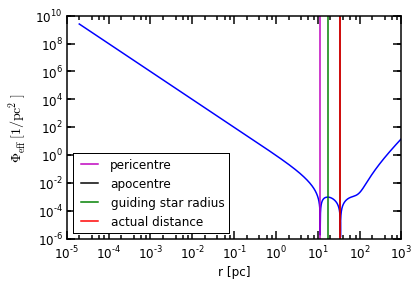

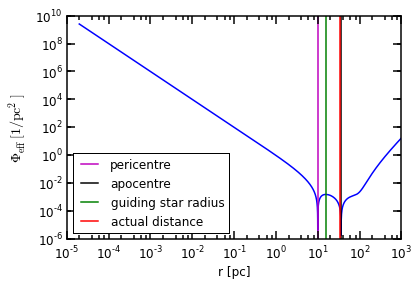

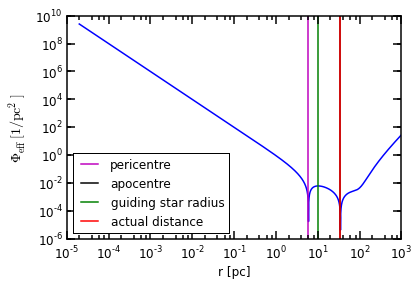

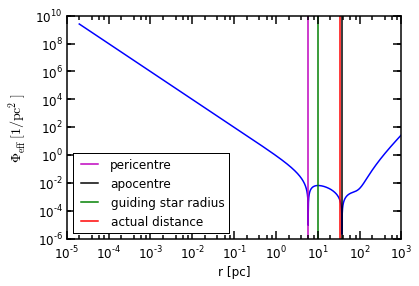

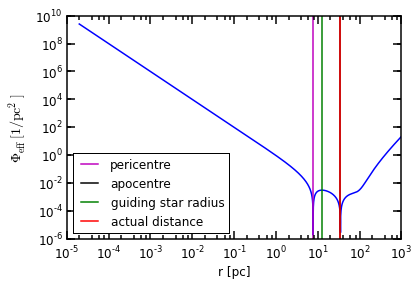

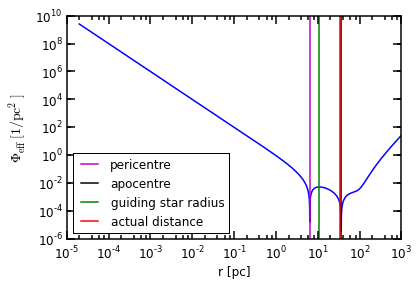

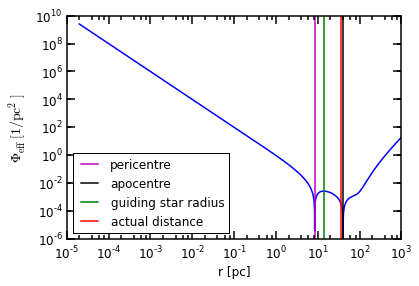

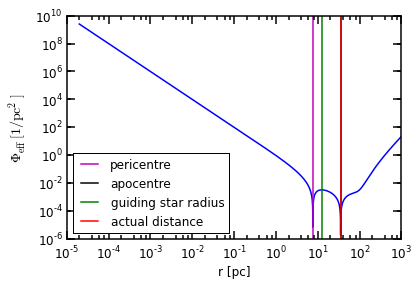

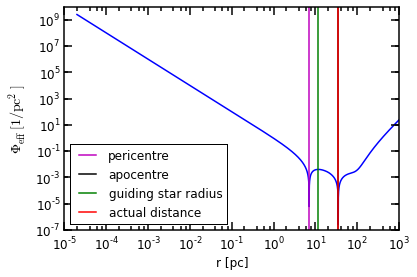

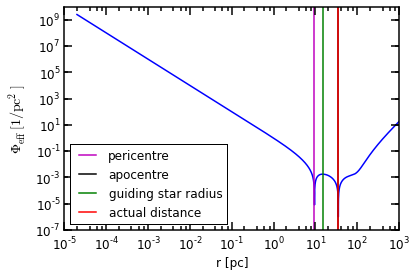

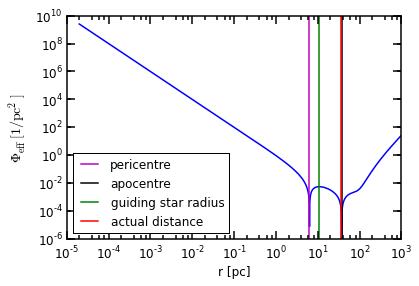

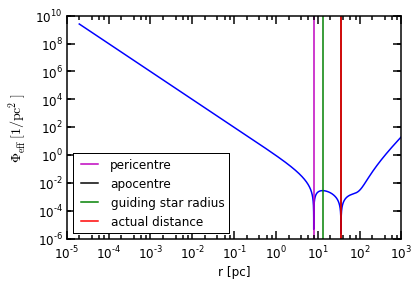

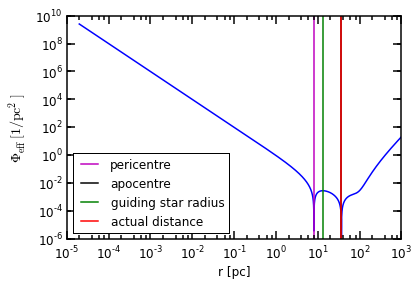

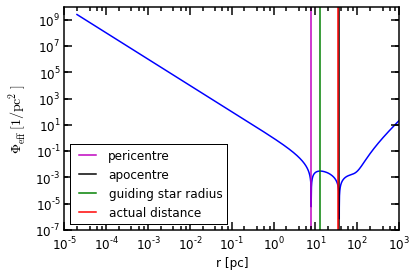

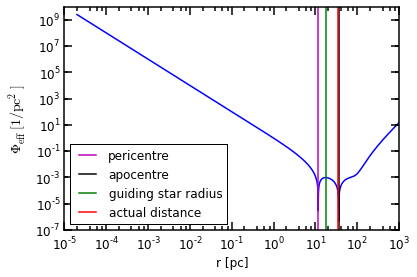

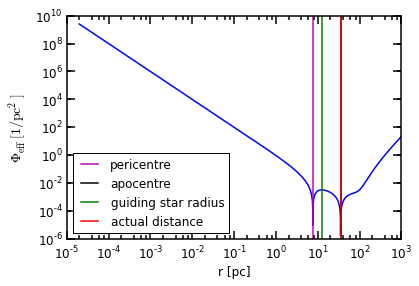

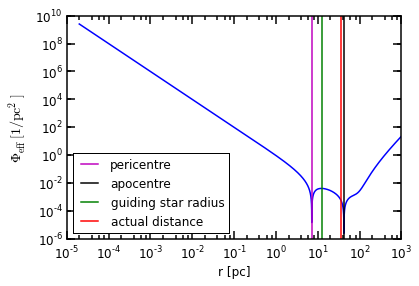

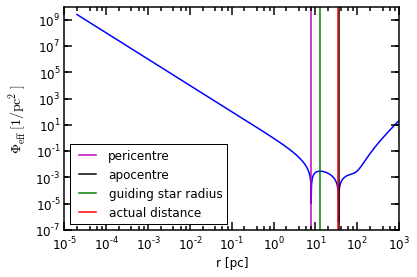

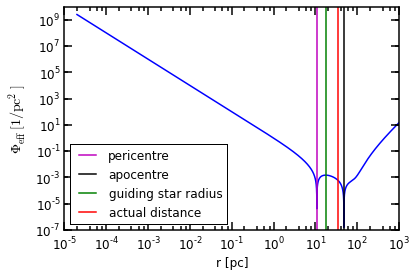

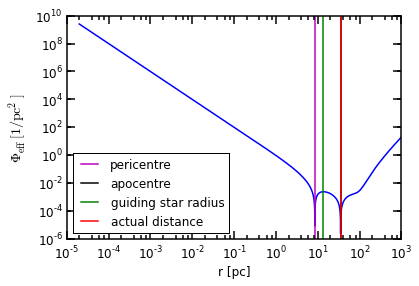

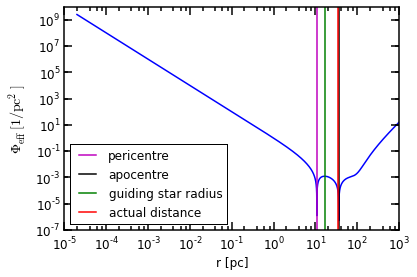

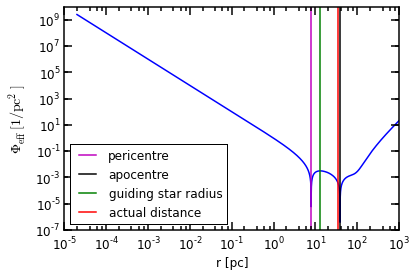

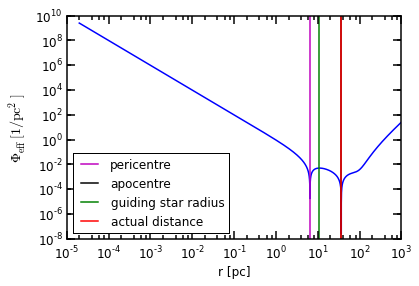

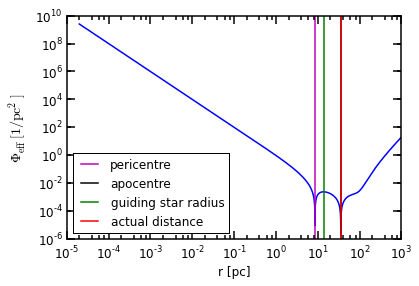

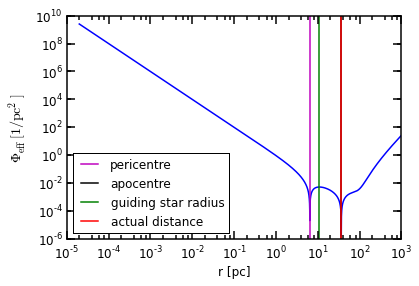

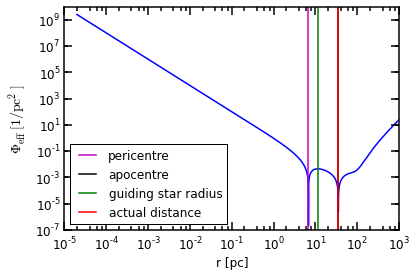

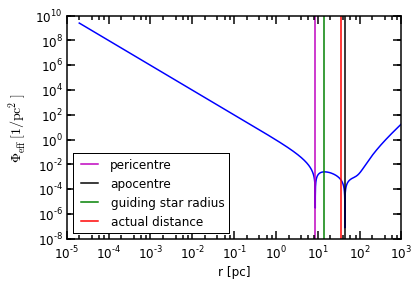

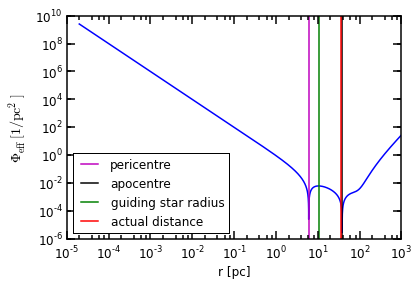

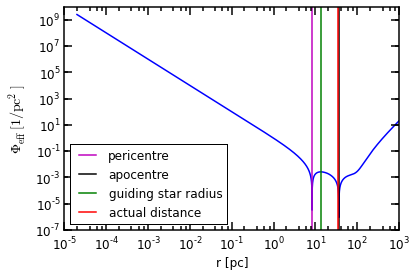

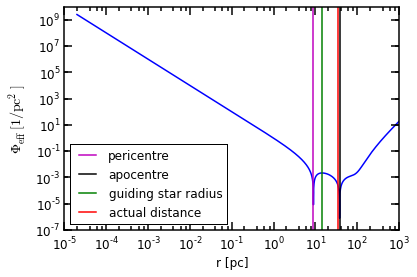

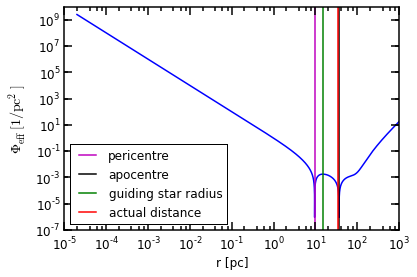

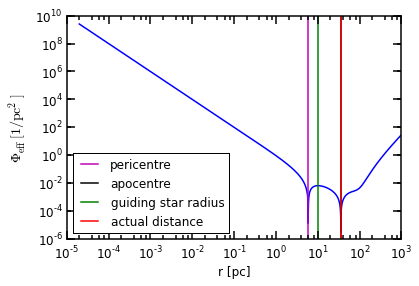

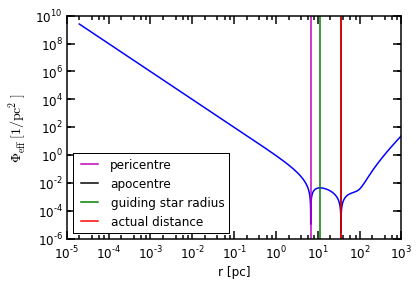

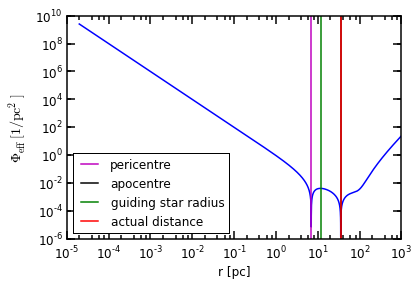

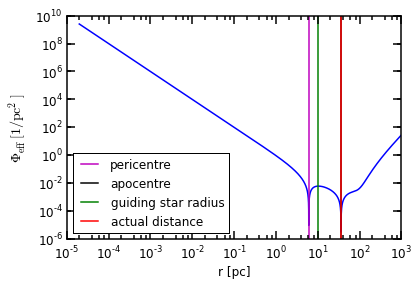

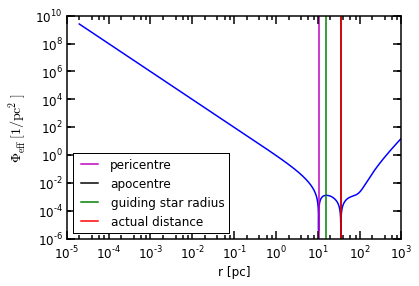

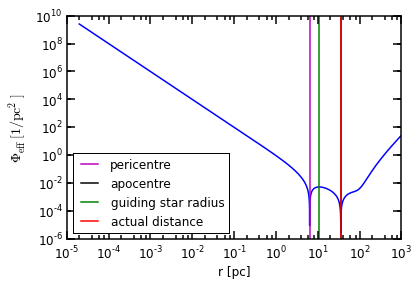

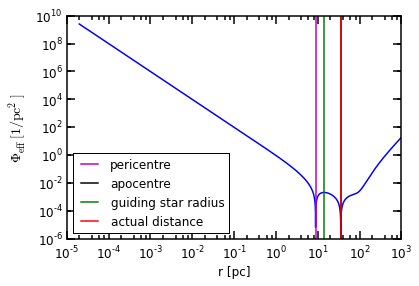

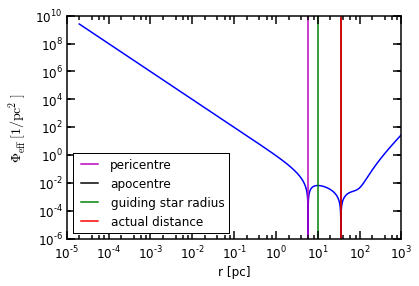

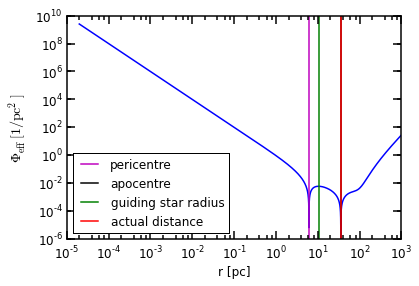

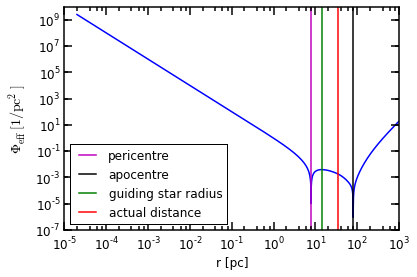

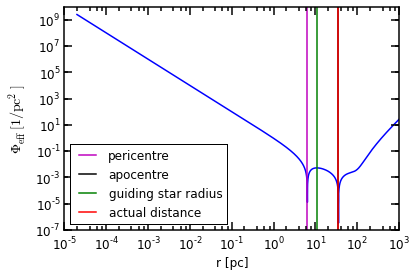

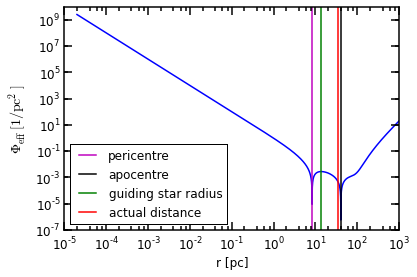

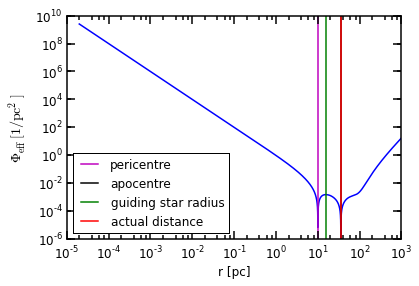

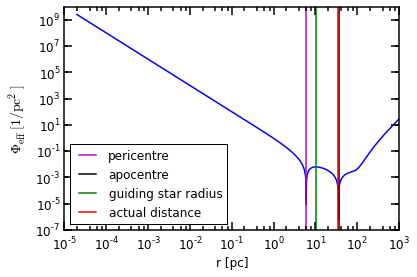

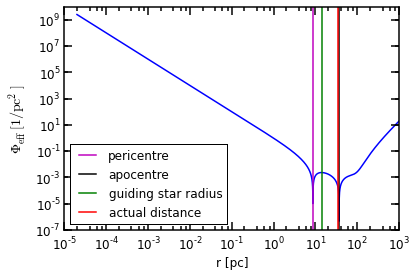

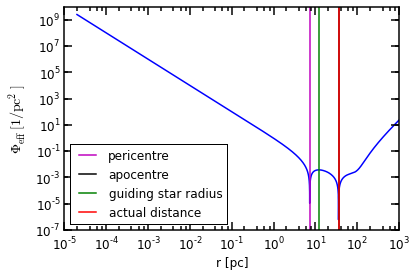

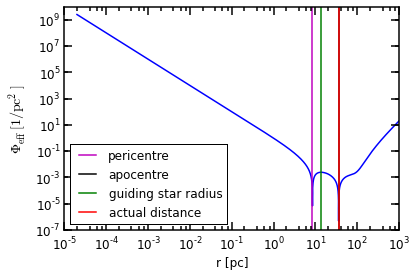

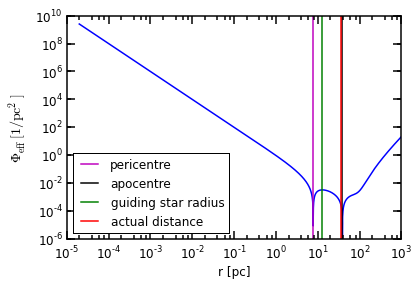

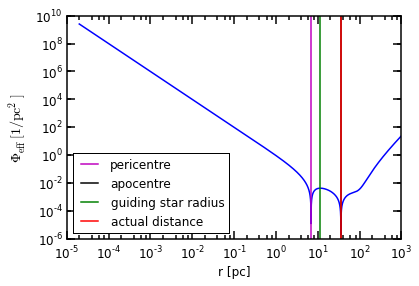

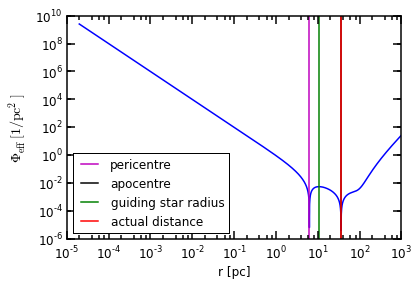

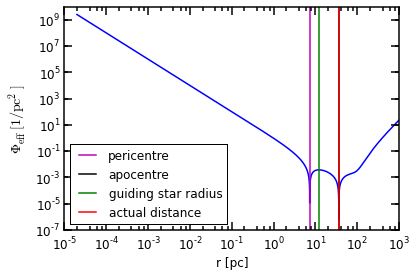

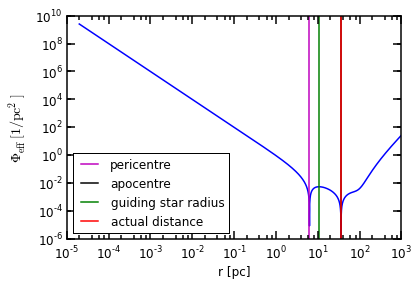

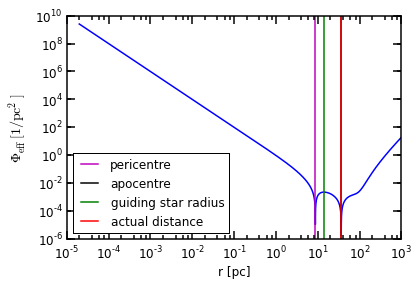

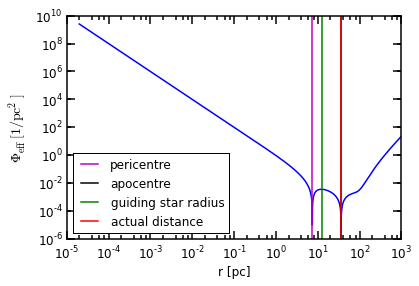

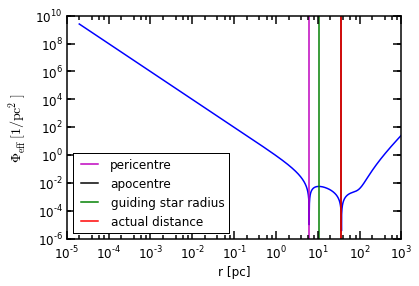

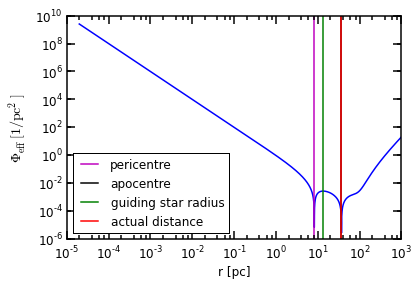

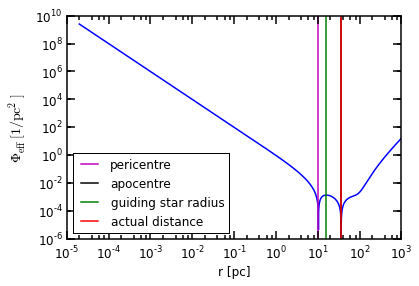

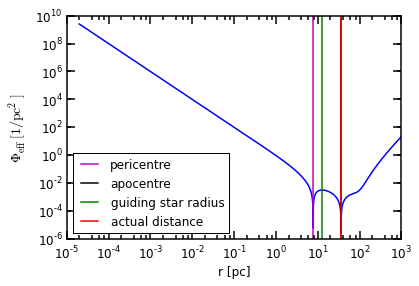

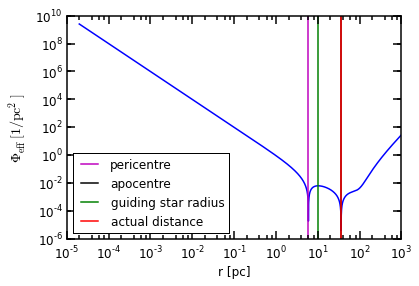

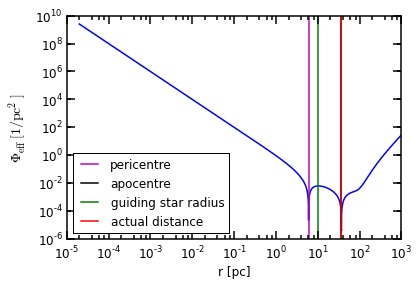

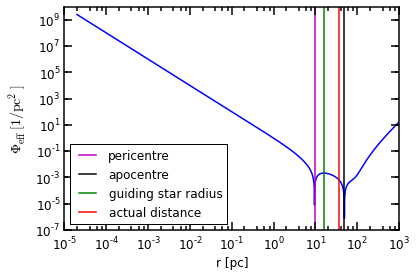

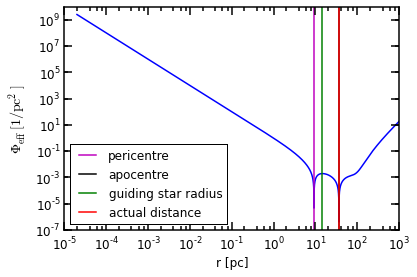

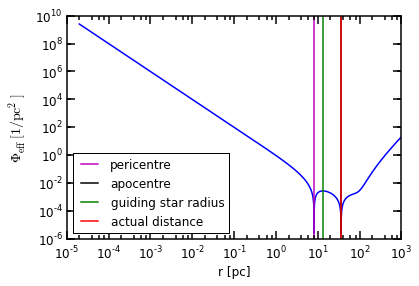

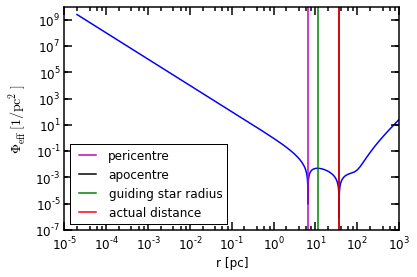

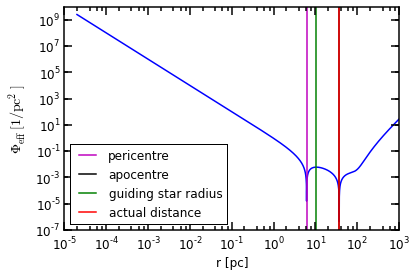

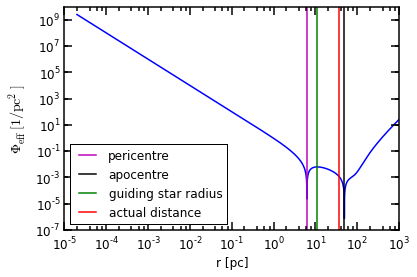

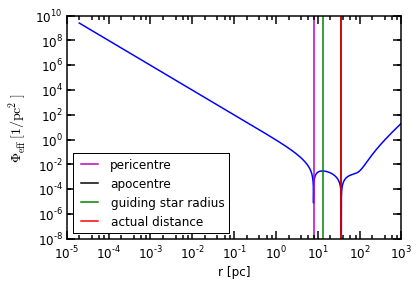

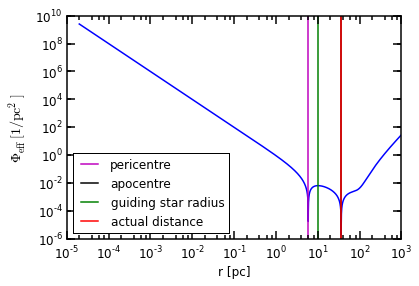

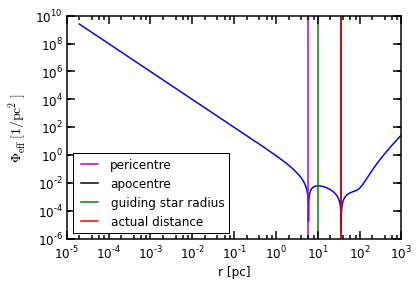

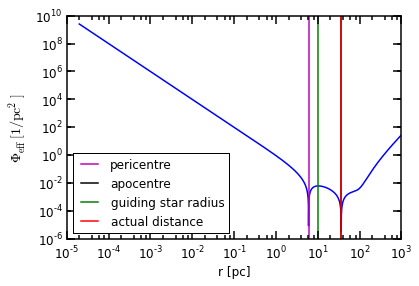

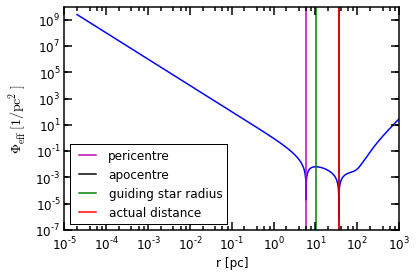

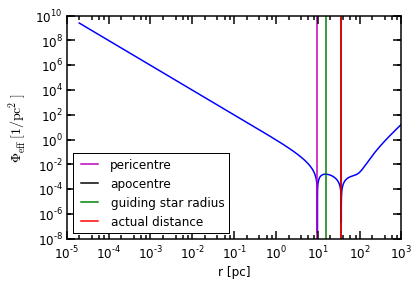

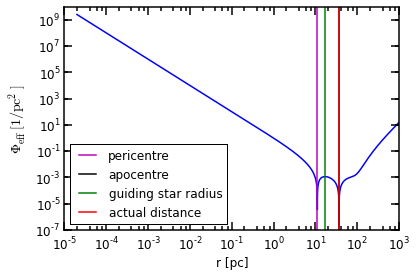

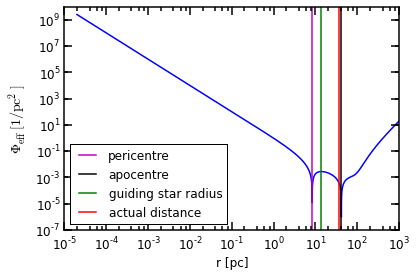

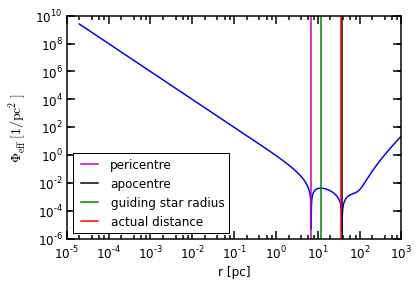

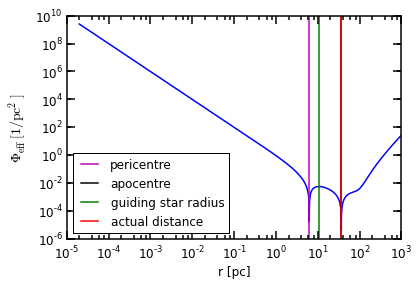

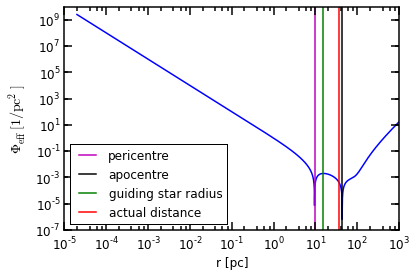

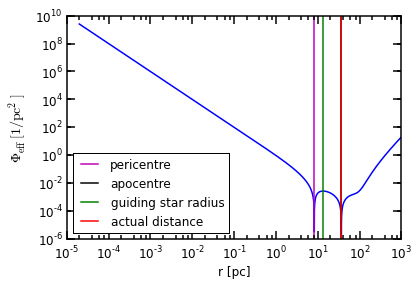

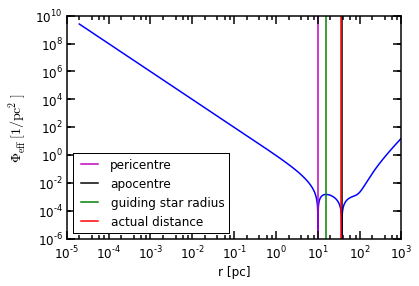

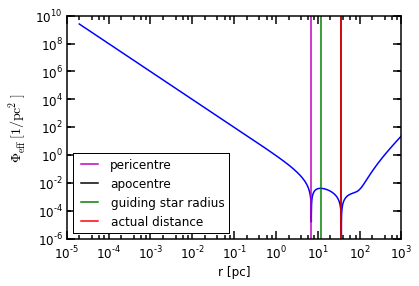

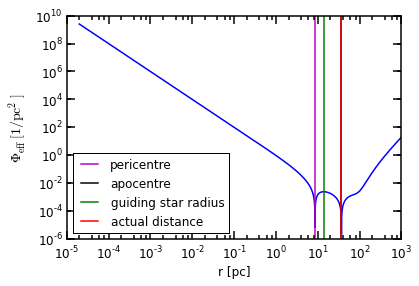

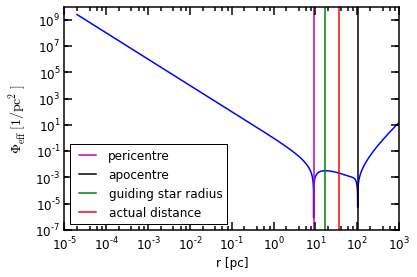

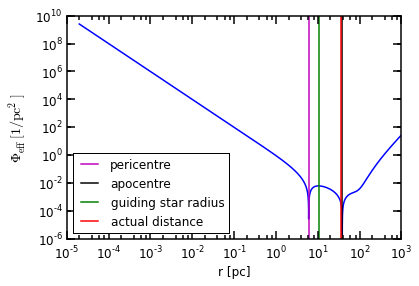

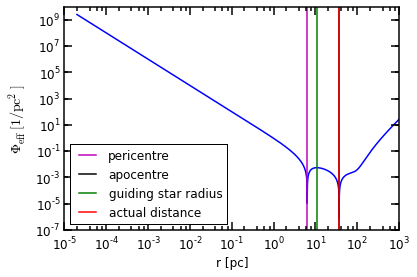

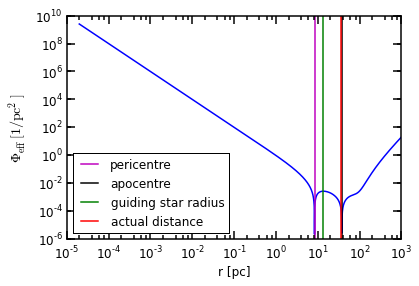

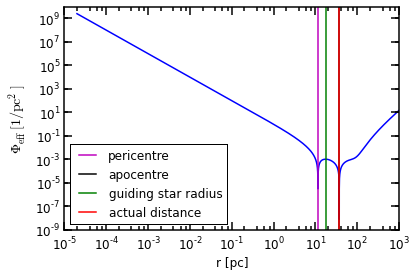

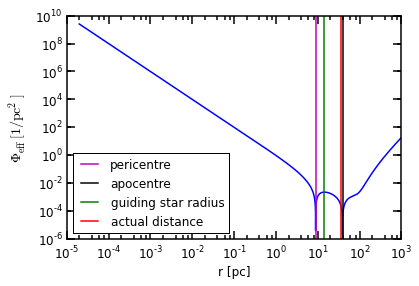

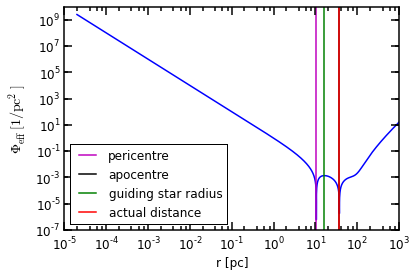

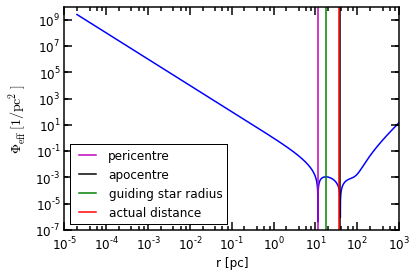

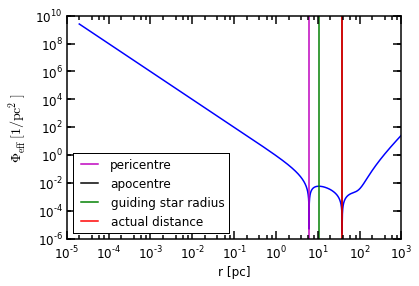

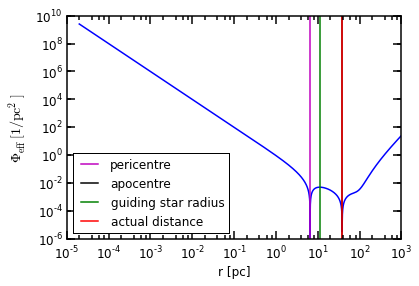

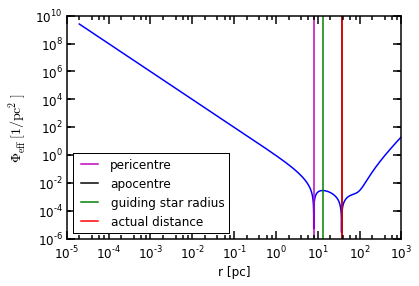

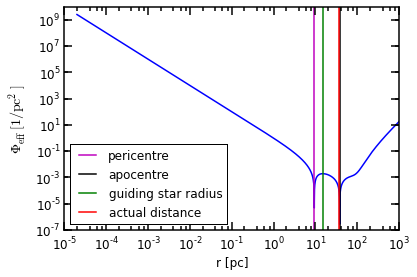

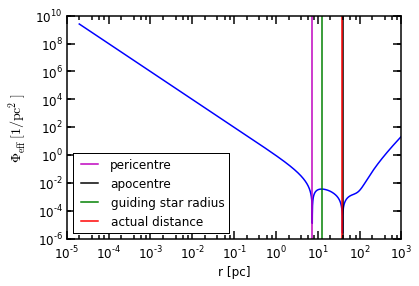

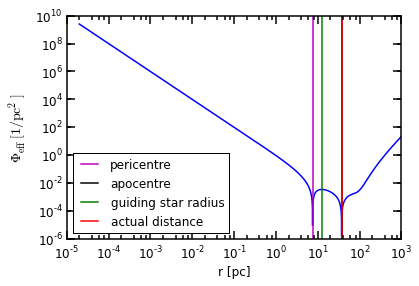

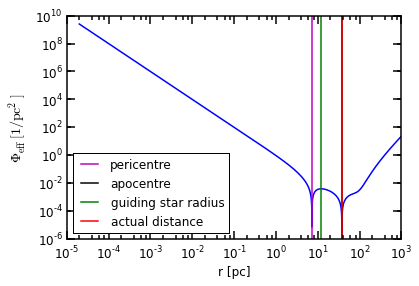

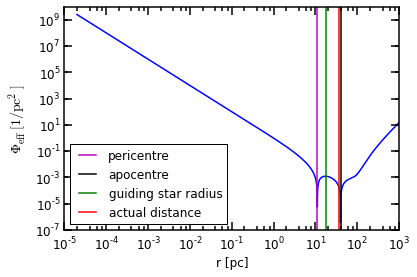

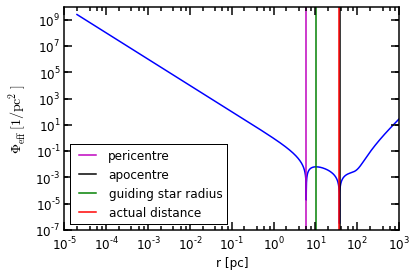

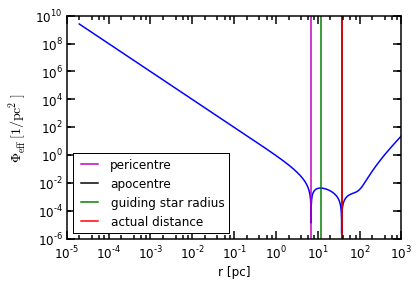

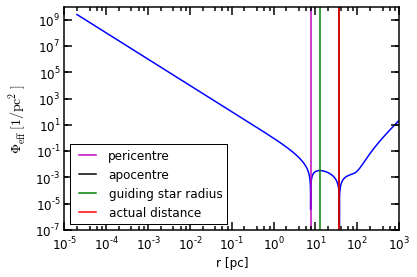

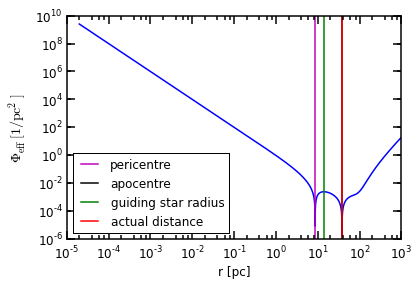

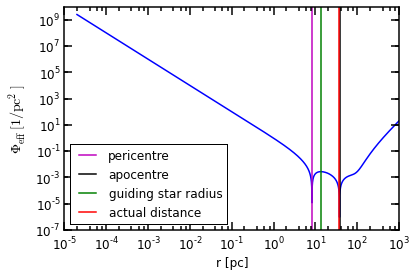

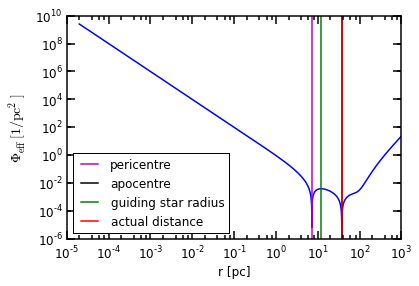

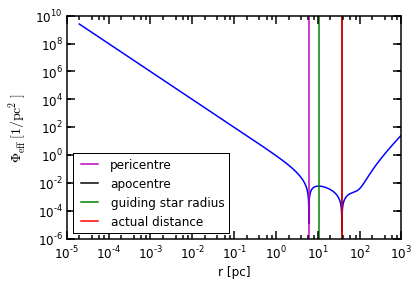

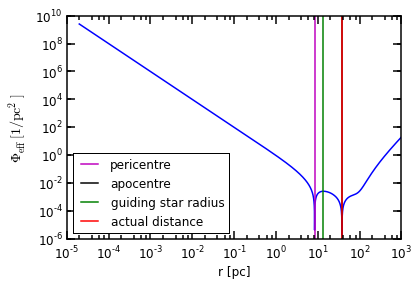

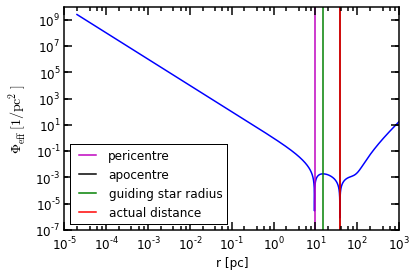

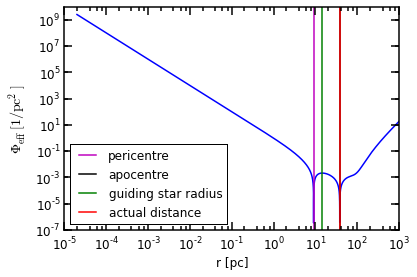

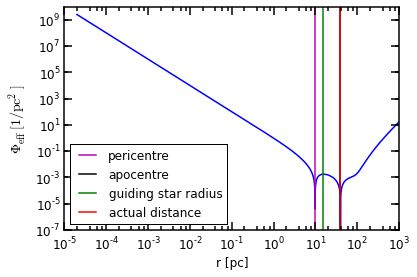

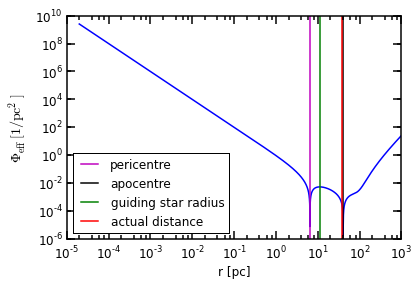

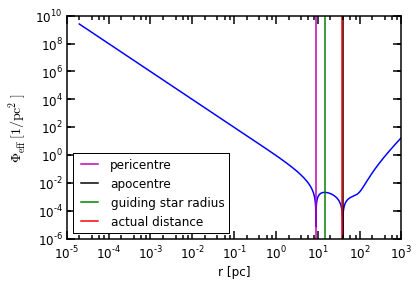

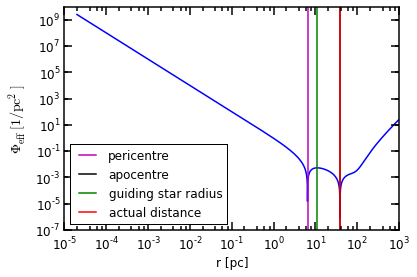

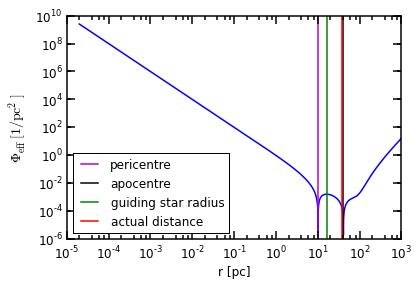

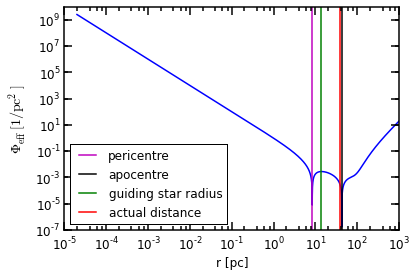

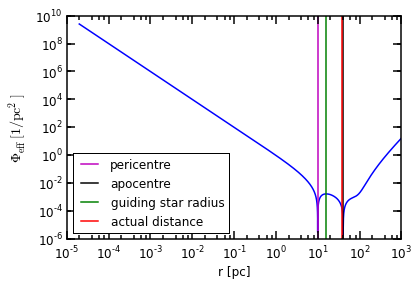

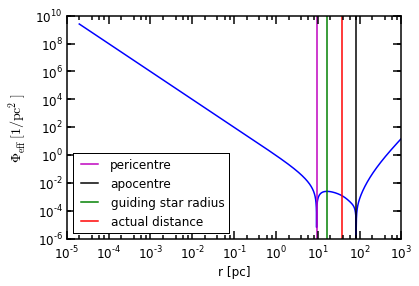

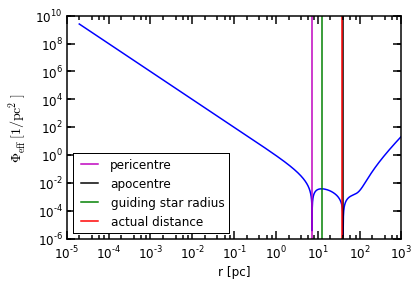

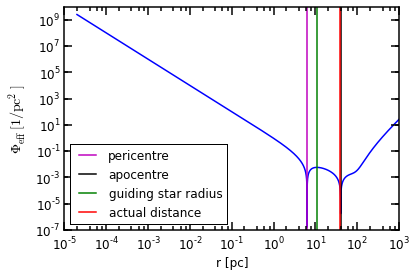

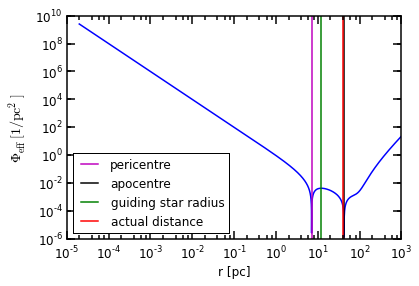

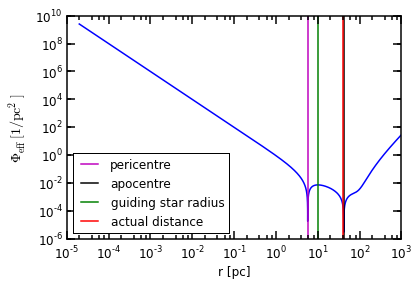

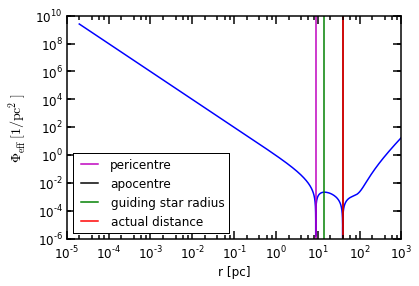

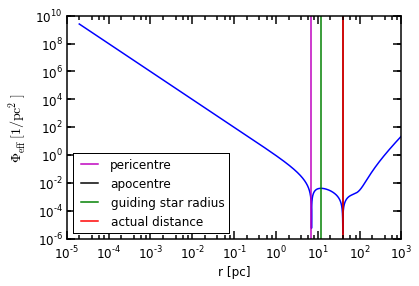

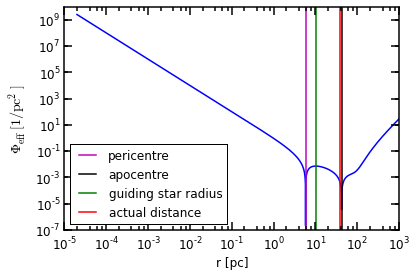

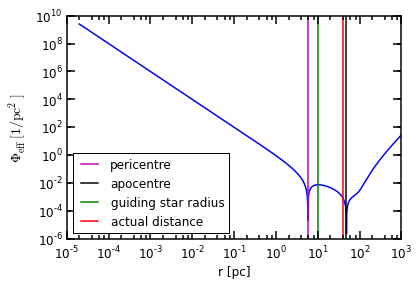

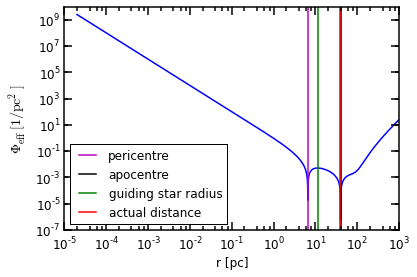

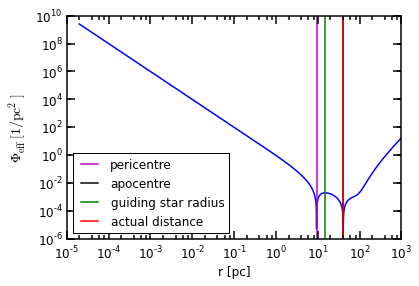

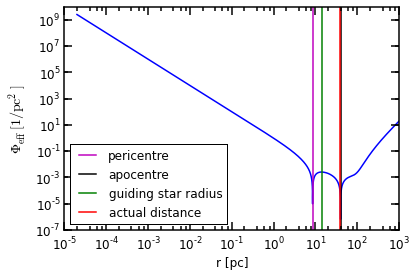

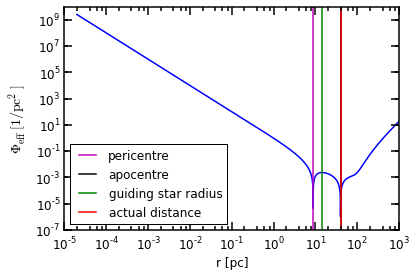

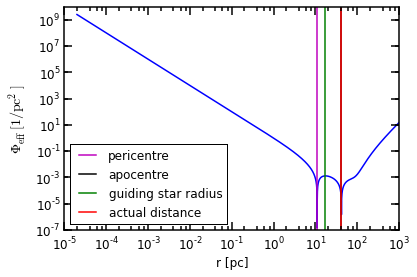

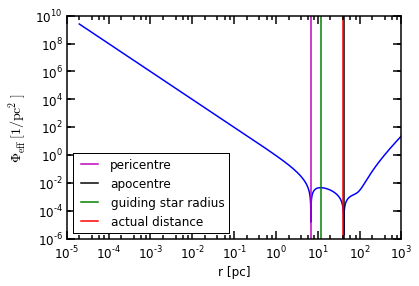

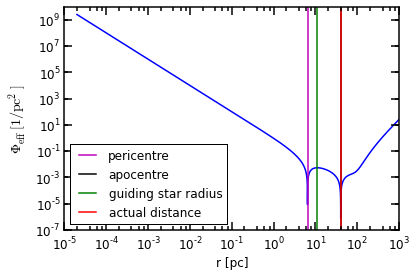

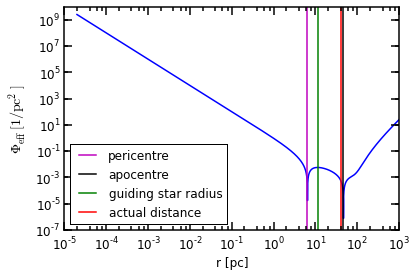

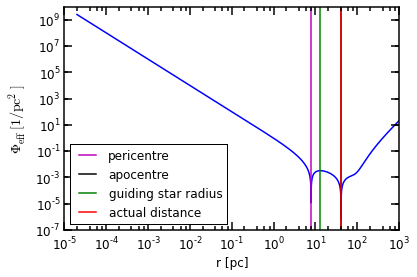

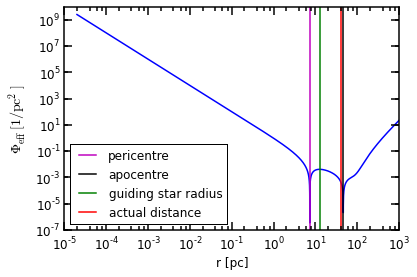

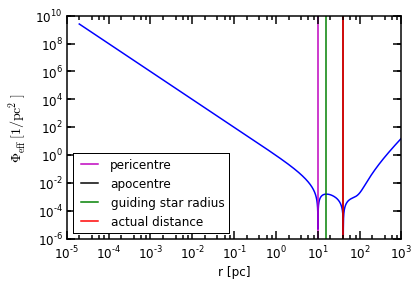

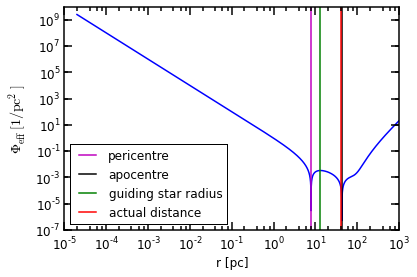

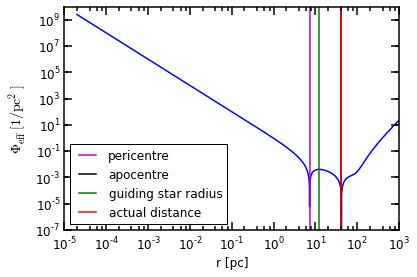

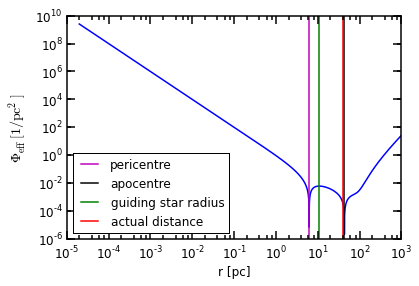

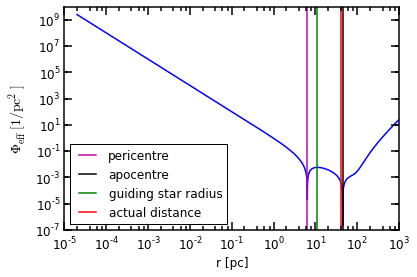

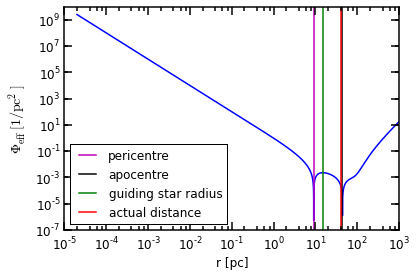

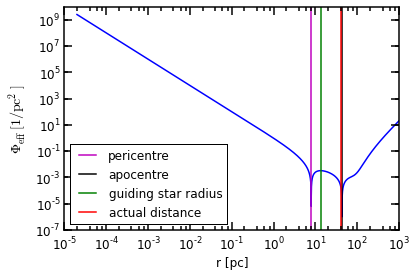

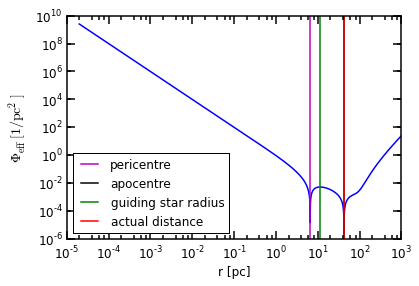

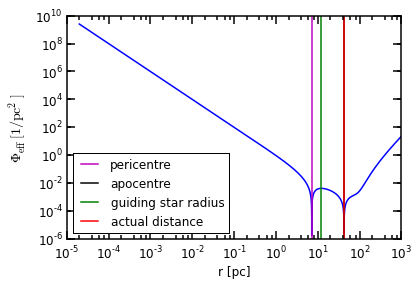

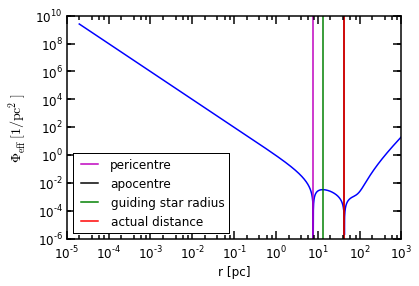

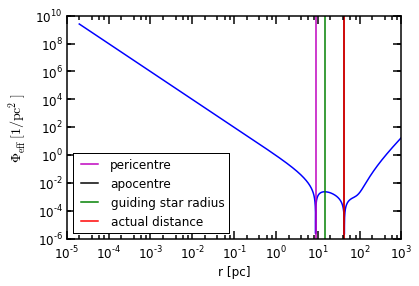

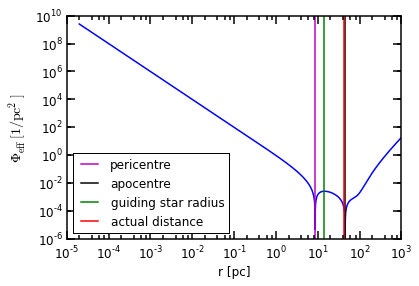

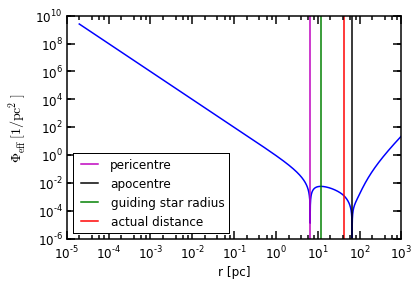

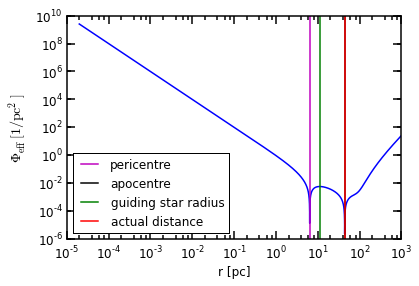

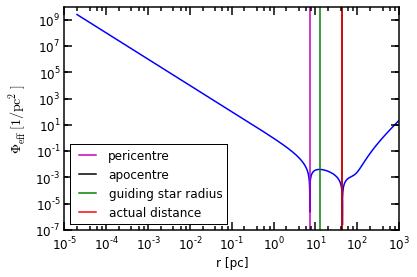

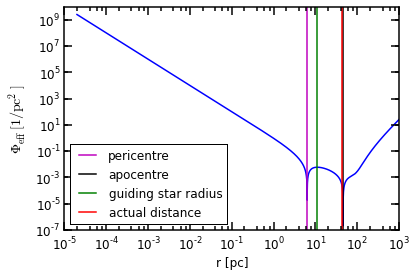

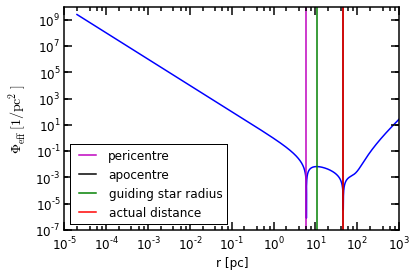

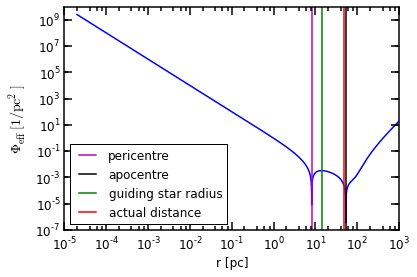

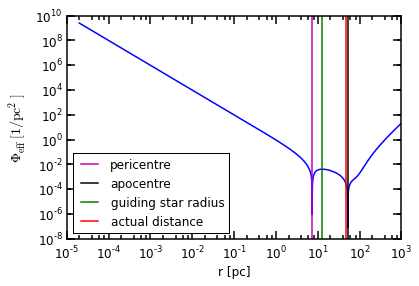

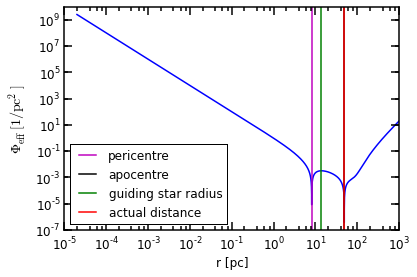

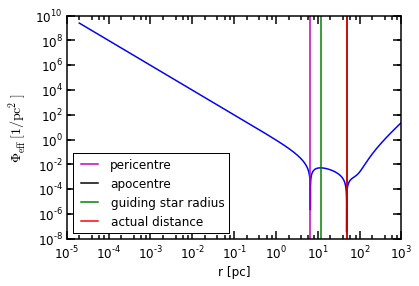

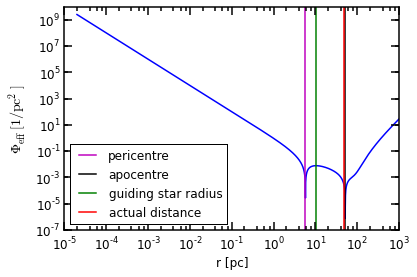

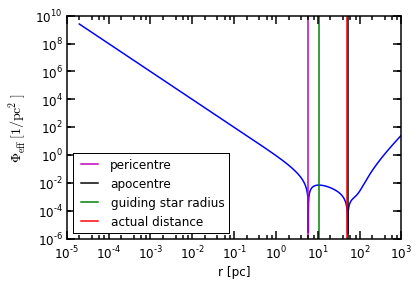

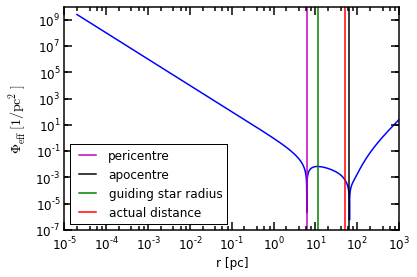

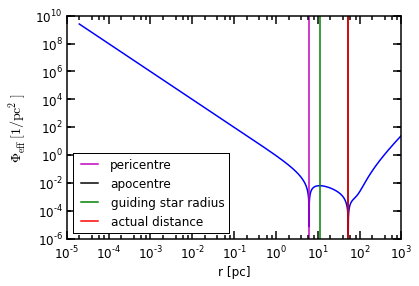

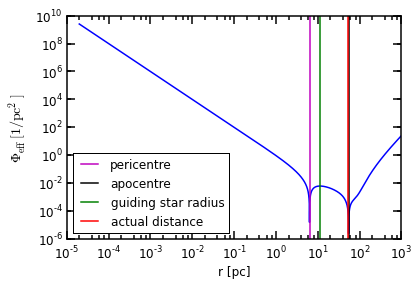

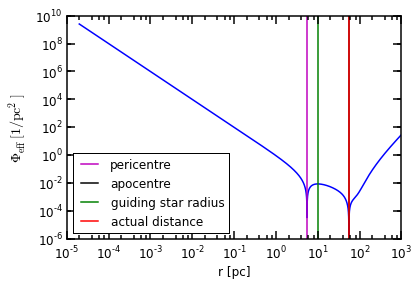

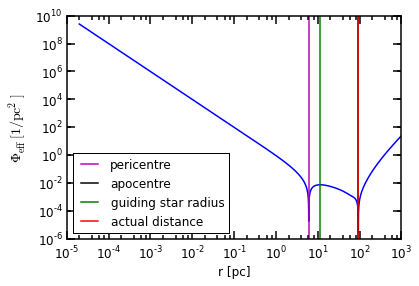

In [24]:
#l=np.array((67,886,1565,7892,30986,79073,107836))
l=np.array((group3[-200:-1]))
#l=np.array((17,1025909))
#text=np.array(('group1','group2'))
for k in range(len(l)):
    L=bh_orbit_1.angularmom(x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[0]
    E=bh_orbit_1.energy(x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    #print(bh_orbit_1._periapocenter_aux(1e-7,E,L),bh_orbit_1._periapocenter_aux(r_3d_1[l[k]],E,L),bh_orbit_1._periapocenter_aux(np.sqrt(x_1[l[k]]**2+y_1[l[k]]**2+z_1[l[k]]**2),E,L),bh_orbit_1._periapocenter_aux(np.max(bh_orbit_1._r_bin)*1.03,E,L))
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.loglog(r,np.abs(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)),linewidth=1.5)
    ax.set_xlabel('r [pc]',fontsize=12)
    ax.set_ylabel('$\Phi_\mathrm{eff}\ [1/\mathrm{pc}^2]$',fontsize=14)
    print(l[k],r_3d_1[l[k]],bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1])
    print(E_1[l[k]],J_r_1[l[k]])
    ax.axvline(bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[0], color='m',label='pericentre',linewidth=1.5)
    ax.axvline(bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1], color='black',label='apocentre',linewidth=1.5)
    ax.axvline(bh_orbit_1.r_guide_min(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]]),color='g',label='guiding star radius',linewidth=1.5)
    ax.axvline(r_3d_1[l[k]],color='r',label='actual distance',linewidth=1.5)    
    ax.legend(loc=0)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)

    ax.tick_params(length=8,width=1.5,labelsize=12)
    ax.tick_params(which='minor',length=4,width=1.5)
    #fig.savefig('../Bachelorarbeit-Entwurf/Plots/pot_eff_'+text[k]+'.pdf',format='pdf',bbbox_inches='tight')
    fig.show()

l=np.array((67,886,1565,7892,30986,79073,107836))
for k in range(len(l)):
    L=bh_orbit_2.angularmom(x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[0]
    E=bh_orbit_2.energy(x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(bh_orbit_2._periapocenter_aux(1e-7,E,L),bh_orbit_2._periapocenter_aux(r_3d_2[l[k]],E,L),bh_orbit_2._periapocenter_aux(np.sqrt(x_2[l[k]]**2+y_2[l[k]]**2+z_2[l[k]]**2),E,L),bh_orbit_2._periapocenter_aux(np.max(bh_orbit_2._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(bh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    print(r_3d_2[l[k]],np.sqrt(x_2[l[k]]**2+y_2[l[k]]**2+z_2[l[k]]**2))
    plt.axvline(r_3d_2[l[k]],color='r',label='actual distance')
    plt.axvline(bh_orbit_2.periapocenter(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[0], color='m',label='pericentre')
    plt.axvline(bh_orbit_2.periapocenter(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]])[1], color='black',label='apocentre')
    plt.axvline(bh_orbit_2.r_guide(r_3d_2[l[k]],x_2[l[k]],y_2[l[k]],z_2[l[k]],vx_2[l[k]],vy_2[l[k]],vz_2[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    plt.show()

l=np.array((67,886,1565,7892,30986,79073,107836))
for k in range(len(l)):
    L=wobh_orbit_1.angularmom(x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[0]
    E=wobh_orbit_1.energy(x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(wobh_orbit_1._periapocenter_aux(1e-7,E,L),wobh_orbit_1._periapocenter_aux(r_3d_wo_1[l[k]],E,L),wobh_orbit_1._periapocenter_aux(np.sqrt(x_wo_1[l[k]]**2+y_wo_1[l[k]]**2+z_wo_1[l[k]]**2),E,L),wobh_orbit_1._periapocenter_aux(np.max(wobh_orbit_1._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(wobh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    print(r_3d_wo_1[l[k]],np.sqrt(x_wo_1[l[k]]**2+y_wo_1[l[k]]**2+z_wo_1[l[k]]**2))
    plt.axvline(r_3d_wo_1[l[k]],color='r',label='actual distance')
    plt.axvline(wobh_orbit_1.periapocenter(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[0], color='m',label='pericentre')
    plt.axvline(wobh_orbit_1.periapocenter(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]])[1], color='black',label='apocentre')
    plt.axvline(wobh_orbit_1.r_guide(r_3d_wo_1[l[k]],x_wo_1[l[k]],y_wo_1[l[k]],z_wo_1[l[k]],vx_wo_1[l[k]],vy_wo_1[l[k]],vz_wo_1[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    plt.show()

In [51]:
blob_sort_wo_2=(0.2<r_guide_wobh_2)*(r_guide_wobh_2<0.3) 
r3d_blobsort_wo_2=r3d_wo_2[blob_sort_wo_2]
J_r_blobsort_wo_2=J_r_wo_2[blob_sort_wo_2]#
test_x=np.flatnonzero(blob_sort_wo_2)


l=test
for k in range(len(test_x)):
    L=wobh_orbit_2.angularmom(x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])[0]
    E=wobh_orbit_2.energy(x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])
    r=10.**(np.linspace(np.log10(0.00002),3.,10000))
    print(E,L,r)
    #print(wobh_orbit_2._periapocenter_aux(1e-7,E,L),wobh_orbit_2._periapocenter_aux(r_3d_wo_2[l[k]],E,L),wobh_orbit_2._periapocenter_aux(np.sqrt(x_wo_2[l[k]]**2+y_wo_2[l[k]]**2+z_wo_2[l[k]]**2),E,L),wobh_orbit_2._periapocenter_aux(np.max(wobh_orbit_2._r_bin)*1.03,E,L))
    plt.loglog(r,np.abs(wobh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))
    plt.xlabel('r[pc]',fontsize=12)
    plt.ylabel('$\Phi_\mathrm{eff}$',fontsize=14)
    #print(r_3d_wo_2[l[k]],np.sqrt(x_wo_2[l[k]]**2+y_wo_2[l[k]]**2+z_wo_2[l[k]]**2))
    plt.axvline(r_3d_wo_2[test_x[k]],color='r',label='actual distance')
    plt.axvline(wobh_orbit_2.periapocenter(r_3d_wo_2[test_x[k]],x_wo_2[test_x[k]],y_wo_2[test_x[k]],z_wo_2[test_x[k]],vx_wo_2[test_x[k]],vy_wo_2[test_x[k]],vz_wo_2[test_x[k]])[0], color='m',label='pericentre')
    plt.axvline(wobh_orbit_2.periapocenter(r_3d_wo_2[test_x[k]],x_wo_2[test_x[k]],y_wo_2[l[k]],z_wo_2[l[k]],vx_wo_2[l[k]],vy_wo_2[l[k]],vz_wo_2[l[k]])[1], color='black',label='apocentre')
    plt.axvline(wobh_orbit_2.r_guide(r_3d_wo_2[l[k]],x_wo_2[l[k]],y_wo_2[l[k]],z_wo_2[l[k]],vx_wo_2[l[k]],vy_wo_2[l[k]],vz_wo_2[l[k]]),color='g',label='guiding star radius')
    plt.legend(loc=0)
    print(k)
    plt.show()

In [ ]:
len(np.abs(wobh_orbit_2._periapocenter_aux(r=r,E=E,L=L)))

In [42]:
len(r)

10000

In [43]:
len(np.abs(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))

1

In [26]:
print(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L))
print(np.min(bh_orbit_1._periapocenter_aux(r=r,E=E,L=L)))

[  2.49989157e+09   9.75713499e+06   2.59748444e+06 ...,   1.27849164e+01
   1.27875550e+01   1.27901935e+01]
-5.02574415137


-2.73457234783e-25


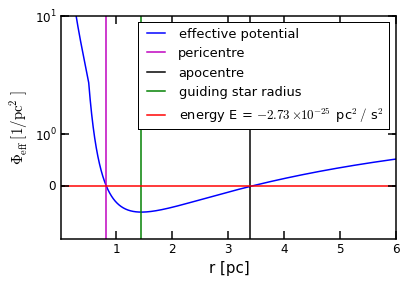

In [21]:
k=46893
L=bh_orbit_1.angularmom(x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])[0]
E=bh_orbit_1.energy(x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])
r=np.logspace(-4,3.,10000)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(r,bh_orbit_1._periapocenter_aux(r=r,E=E,L=L),label='effective potential',linewidth=1.5)
ax.set_xlim(0.01,6)
ax.set_ylim(-1e0,1e1)
ax.set_xlabel('r [pc]',fontsize=15)
ax.set_ylabel('$\Phi_\mathrm{eff}\ [1/\mathrm{pc}^2]$',fontsize=15)
ax.set_yscale('symlog')
#print(l[k],r_3d_1[l[k]],bh_orbit_1.periapocenter(r_3d_1[l[k]],x_1[l[k]],y_1[l[k]],z_1[l[k]],vx_1[l[k]],vy_1[l[k]],vz_1[l[k]])[1])
#print(E_1[l[k]],J_r_1[l[k]])
ax.axvline(bh_orbit_1.periapocenter(r_3d_1[k],x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])[0], color='m',label='pericentre',linewidth=1.5)
ax.axvline(bh_orbit_1.periapocenter(r_3d_1[k],x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k])[1], color='black',label='apocentre',linewidth=1.5)
ax.axvline(bh_orbit_1.r_guide_root(r_3d_1[k],x_1[k],y_1[k],z_1[k],vx_1[k],vy_1[k],vz_1[k]),color='g',label='guiding star radius',linewidth=1.5)
#ax.axvline(r_3d_1[l[k]],color='r',label='actual distance',linewidth=1.5)    
print(E)
ax.axhline(E,label='energy E = $-2.73 \\times 10^{-25}$ pc$^2/$ s$^2$',c='r',linewidth=1.5)
ax.legend(loc=0,fontsize=13)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.savefig('../Bachelorarbeit-Entwurf/Plots/pot_eff_theory_part.pdf',format='pdf',bbox_inches='tight')
#fig.show()